In [1]:
# load packages
from sklearn import metrics,preprocessing,model_selection
from sklearn.metrics import accuracy_score
import keras
from keras.layers import Input, Lambda, Dense
from keras.models import Model
import keras.backend as K
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import string
import pandas as pd
import re
import spacy
from nltk.corpus import stopwords
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS
from spacy.lang.en import English
parser = English()

import pandas as pd # provide sql-like data manipulation tools. very handy.
pd.options.mode.chained_assignment = None
import numpy as np # high dimensional vector computing library.
from copy import deepcopy
from string import punctuation
from random import shuffle

import gensim
from gensim.models.word2vec import Word2Vec # the word2vec model gensim class

from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

from nltk.tokenize import TweetTokenizer # a tweet tokenizer from nltk.
tokenizer = TweetTokenizer()
from gensim.models.doc2vec import TaggedDocument



from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
from keras import backend as K
from sklearn.tree import DecisionTreeClassifier

In [186]:
# Load my pre trained elmo model
elmo = hub.load('/Users/andrewsimon/Downloads/elmo_3')

In [187]:
main_data = pd.read_csv('/Users/andrewsimon/Desktop/Dow_dat.csv')

In [171]:
main_data

,Level,Report
0,2,"On April 10th at 12:30 PM, there was an incide..."
1,3,"On April 8th at 9:00 PM, a fire broke out in t..."
2,4,"On April 6th at 2:45 AM, there was an incident..."
3,1,"On April 5th at 7:15 PM, there was an unplanne..."
4,5,"On April 2nd at 11:30 AM, there was a minor in..."
...,...,...
295,3,"At 9:45 AM, a worker reported a small leak of ..."
296,5,"At 2:30 PM, a worker reported a small spill of..."
297,4,"At 6:15 AM, a worker reported an unusual odor ..."
298,2,"At 11:00 AM, a worker reported a small fire in..."


In [189]:
# Iterate through sentences, append weighted average of elmo embeddings
embeddings = []

for sentence in main_data['Report']:
    tensor = tf.constant([sentence])
    embedding = elmo.signatures['default'](tensor)['elmo']
    embedding = tf.reduce_mean(embedding, 1)
    embeddings.append(embedding)


In [190]:
X_train, X_test, y_train, y_test = train_test_split(embeddings,
                                                    main_data['Level'], test_size=0.2, random_state=42)

In [191]:
X_train = np.array(X_train)
X_train = X_train.reshape(240, 1024)

X_test = np.array(X_test)
X_test = X_test.reshape(60, 1024)

X_train.shape

(240, 1024)

In [70]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression( max_iter = 100000)
classifier.fit(X_train_scaled, y_train)
predictions_LR = classifier.predict(X_test_scaled)
score = classifier.score(X_test_scaled, y_test)
score

NameError: name 'X_train_scaled' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

len(y_test)
cm = confusion_matrix(y_test, predictions_LR)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [1,2,3,4,5])
disp.plot()

In [ ]:
clf_decision_tree = DecisionTreeClassifier()
clf_decision_tree.fit(X_train, y_train)
predictions_DT = clf_decision_tree.predict(X_test)
acc_score = accuracy_score(y_test, predictions_DT)
acc_score

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

len(y_test)
cm = confusion_matrix(y_test, predictions_DT)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [1,2,3,4,5])
disp.plot()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [193]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1100).fit(X_train, y_train)
predictions = rf.predict(X_test)
score = rf.score(X_test, y_test)
score

0.75

In [ ]:
import tensorflow_decision_forests as tfdf

In [ ]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

2/2 - 0s - loss: 1.1934 - accuracy: 0.7667 - 65ms/epoch - 33ms/step


In [81]:
# Experiment building a model with tensorflow
import tensorflow as tf

model = tf.keras.Sequential([
     tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(6, activation='sigmoid'),
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, verbose=2)



Epoch 1/100
15/15 - 0s - loss: 1.6128 - accuracy: 0.2458 - 193ms/epoch - 13ms/step
Epoch 2/100


/Users/andrewsimon/Library/Python/3.8/lib/python/site-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


15/15 - 0s - loss: 1.3212 - accuracy: 0.4625 - 51ms/epoch - 3ms/step
Epoch 3/100
15/15 - 0s - loss: 1.0842 - accuracy: 0.5458 - 72ms/epoch - 5ms/step
Epoch 4/100
15/15 - 0s - loss: 1.0033 - accuracy: 0.5500 - 43ms/epoch - 3ms/step
Epoch 5/100
15/15 - 0s - loss: 0.9090 - accuracy: 0.6250 - 33ms/epoch - 2ms/step
Epoch 6/100
15/15 - 0s - loss: 0.8179 - accuracy: 0.6667 - 31ms/epoch - 2ms/step
Epoch 7/100
15/15 - 0s - loss: 0.7775 - accuracy: 0.6917 - 32ms/epoch - 2ms/step
Epoch 8/100
15/15 - 0s - loss: 0.7318 - accuracy: 0.7021 - 32ms/epoch - 2ms/step
Epoch 9/100
15/15 - 0s - loss: 0.7056 - accuracy: 0.6792 - 34ms/epoch - 2ms/step
Epoch 10/100
15/15 - 0s - loss: 0.6390 - accuracy: 0.7563 - 33ms/epoch - 2ms/step
Epoch 11/100
15/15 - 0s - loss: 0.6180 - accuracy: 0.7521 - 34ms/epoch - 2ms/step
Epoch 12/100
15/15 - 0s - loss: 0.5713 - accuracy: 0.7875 - 36ms/epoch - 2ms/step
Epoch 13/100
15/15 - 0s - loss: 0.5242 - accuracy: 0.8125 - 38ms/epoch - 3ms/step
Epoch 14/100
15/15 - 0s - loss: 0.56

In [76]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

4/4 - 0s - loss: 0.3269 - accuracy: 0.9250 - 66ms/epoch - 17ms/step


In [94]:
preds = model.predict(X_test)

2/2 [==============================] - 0s 2ms/step


In [76]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [1,2,3,4,5])
disp.plot()

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

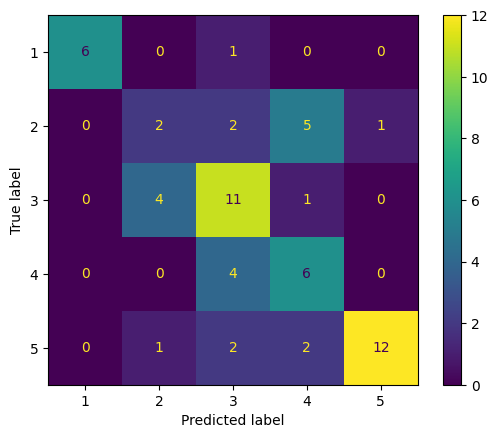

In [99]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

len(y_test)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [1,2,3,4,5])
disp.plot()

In [ ]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)
SVM_predict = clf.predict(X_test)
score = clf.score(X_test, y_test)
score

In [ ]:
len(y_test)
cm = confusion_matrix(y_test, SVM_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [1,2,3,4,5])
disp.plot()